## Problem Statement
Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The company through their brand’s Sales and Marketing team would like to understand their customer’s behavior from data they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups. The findings should help inform the team in formulating the marketing and sales strategies of the brand. 

## Experimental Design
Perform clustering and dimensionality reduction stating insights drawn from the analysis and visualization
Compare the approaches between 
    - K-Means clustering vs Hierarchical clustering, 
    - PCA vs t SNE 
highlighting the strengths and limitations of each approach in the context of the analysis. 


In [ ]:

#installing the packages
# List of packages
package_list <- c("tidyverse", "lubridate", "readxl", "tidyr", "Hmisc", "skimr",
                  "ggcorrplot","caret", "caretEnsemble", "PerformanceAnalytics",
                  "kableExtra", "kernlab", "randomForest", "xgboost")

# Load/Install packages
suppressMessages(pacman::p_load(package_list, character.only = TRUE))

In [283]:
ons <- read.csv("online_shoppers_intention.csv")

head(ons)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [284]:
dim(ons)

[1] 12330    18

The dataset has 12330 rows and 18 columns

The revenue column is labeled so I shall drop so as to perform unsupervised learning

In [285]:
#dropping the revenue column
new_ons = ons[, -c(18)]
head(new_ons)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE


## Data Cleaning

In [286]:
#checking the column names
colnames(new_ons)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"

In [287]:
#converting the column names into lower case for uniformity

colnames(new_ons) = tolower(colnames(new_ons))

In [288]:
#checking the column names to see they are now in lower case
colnames(new_ons)

[1] "administrative"          "administrative_duration"
 [3] "informational"           "informational_duration" 
 [5] "productrelated"          "productrelated_duration"
 [7] "bouncerates"             "exitrates"              
 [9] "pagevalues"              "specialday"             
[11] "month"                   "operatingsystems"       
[13] "browser"                 "region"                 
[15] "traffictype"             "visitortype"            
[17] "weekend"

In [289]:
#checking for any missing values using the colSums() function
colSums(is.na(new_ons))

administrative administrative_duration           informational 
                     14                      14                      14 
 informational_duration          productrelated productrelated_duration 
                     14                      14                      14 
            bouncerates               exitrates              pagevalues 
                     14                      14                       0 
             specialday                   month        operatingsystems 
                      0                       0                       0 
                browser                  region             traffictype 
                      0                       0                       0 
            visitortype                 weekend 
                      0                       0

In [290]:
install.packages("DataExplorer")
library("DataExplorer")

Warning message:
"package 'DataExplorer' is in use and will not be installed"

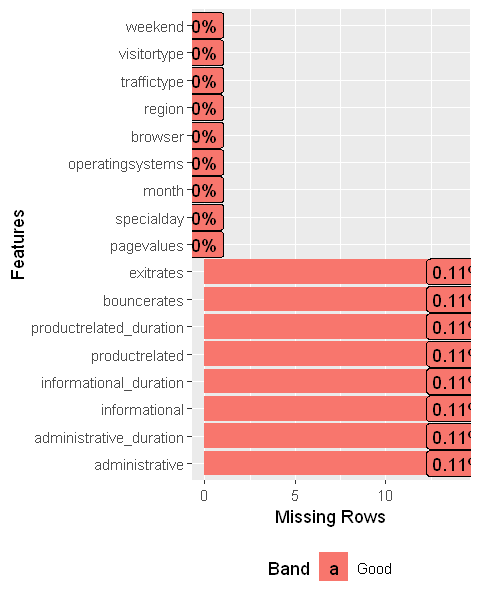

In [291]:
#using the data explorer library to get to see the missing values percentage
plot_missing(new_ons)


From the graph above, the features exitrates, bouncerates, productrelated_duration, productrelated, information_duration, informational, administrative_duration and administrative all have 0.11% that is 14 missing values.


In [292]:
#creating a subset of the missing values before making a decision of what to do with the missing values
missing_cols = new_ons[, 10:17]

#select(new_ons, colnames(new_ons[, 10:17]))

In [293]:
library(data.table)

In [294]:
#creating a table that shows the exact row that has missing values
missing = data.table(apply(is.na(new_ons), 2, which))
missing

V1
"1066, 1133, 1134, 1135, 1136, 1137, 1474, 1475, 1476, 1477, 2038, 2039, 2040, 2754"
"1066, 1133, 1134, 1135, 1136, 1137, 1474, 1475, 1476, 1477, 2038, 2039, 2040, 2754"
"1066, 1133, 1134, 1135, 1136, 1137, 1474, 1475, 1476, 1477, 2038, 2039, 2040, 2754"
"1066, 1133, 1134, 1135, 1136, 1137, 1474, 1475, 1476, 1477, 2038, 2039, 2040, 2754"
"1066, 1133, 1134, 1135, 1136, 1137, 1474, 1475, 1476, 1477, 2038, 2039, 2040, 2754"
"1066, 1133, 1134, 1135, 1136, 1137, 1474, 1475, 1476, 1477, 2038, 2039, 2040, 2754"
"1066, 1133, 1134, 1135, 1136, 1137, 1474, 1475, 1476, 1477, 2038, 2039, 2040, 2754"
"1066, 1133, 1134, 1135, 1136, 1137, 1474, 1475, 1476, 1477, 2038, 2039, 2040, 2754"
""
""


From the output it shows that the missing values are all in the same rows, so let's have a look at the missing rows data

In [295]:
#selecting the rows with the missing values
new_ons[c((1066),(1133:1137), (1474:1477), (2038:2040), (2754)),]

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
1066,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,2,1,Returning_Visitor,FALSE
1133,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,1,1,1,2,Returning_Visitor,FALSE
1134,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,4,5,1,Returning_Visitor,FALSE
1135,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,1,2,Returning_Visitor,FALSE
1136,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,3,2,1,1,Returning_Visitor,FALSE
1137,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,1,2,Returning_Visitor,FALSE
1474,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,1,1,Returning_Visitor,TRUE
1475,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,1,1,6,1,Returning_Visitor,TRUE
1476,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,3,1,Returning_Visitor,FALSE
1477,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,1,1,2,3,Returning_Visitor,FALSE


The results show that all missing values lie in the month of March and only one in May, the last row. Since the missing values contribute a very low significant amount to the whole dataset, i shall opt to delete them.

In [409]:
dim(online)

[1] 12316    17

What remains after deleting all rows with na values is 12316 rows less the 14 that had null values.

In [298]:
#checking for the number of unique values in the dataset
sapply(online, function(x) length(unique(x)))

administrative administrative_duration           informational 
                     27                    3336                      17 
 informational_duration          productrelated productrelated_duration 
                   1259                     311                    9552 
            bouncerates               exitrates              pagevalues 
                   1872                    4777                    2704 
             specialday                   month        operatingsystems 
                      6                      10                       8 
                browser                  region             traffictype 
                     13                       9                      20 
            visitortype                 weekend 
                      3                       2

In [299]:
#checking for duplicate values
dups = online[duplicated(online),]
head(dups,20)

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE
179,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE
419,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE
457,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE
484,0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE
513,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE
555,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE
590,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE
660,0,0,0,0,2,0,0.2,0.2,0,0,Mar,2,5,1,1,Returning_Visitor,FALSE
775,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE


Most of the observations that appear as duplicates are not actually duplicates since checking for any duplicated value brings only one observation, row 159 as the duplicate. I shall remove these duplicated values.

In [300]:
#looking at the dimension of the duplicated values
dim(dups)


[1] 117  17

In [301]:
#checking for duplicates in the dataset

anyDuplicated(online)

[1] 159

In [411]:
#removing the duplicated values
unique_items <- online[!duplicated(online),]

In [413]:
unique_items <- unique(df)

ERROR: Error in unique.default(df): unique() applies only to vectors


## Exploratory Data Analysis

In [388]:
#now using the cleaned dataset online to perform EDA
#checking the column data types
glimpse(onlin)

Observations: 12,316
Variables: 17
$ administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...
$ administrative_duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ informational_duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ productrelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6...
$ productrelated_duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 6...
$ bouncerates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05...
$ exitrates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14...
$ pagevalues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ specialday              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8...
$ month                   <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...
$ operatingsystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3...
$ browser        

In [389]:
#viewing the statistical summary of the dataset
summary(onlin)

 administrative   administrative_duration informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 informational_duration productrelated   productrelated_duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  bouncerates         exitrates         pagevalues        specialday    
 Min.   :0.000000   Min.   :0.00000   Min.   :  0.000   Min

In [390]:
describe(onlin)

onlin 

 17  Variables      12316  Observations
--------------------------------------------------------------------------------
administrative 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12316        0       27    0.895    2.318    3.177        0        0 
     .25      .50      .75      .90      .95 
       0        1        4        7        9 

lowest :  0  1  2  3  4, highest: 22 23 24 26 27
--------------------------------------------------------------------------------
administrative_duration 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12316        0     3336    0.892    80.91    124.9      0.0      0.0 
     .25      .50      .75      .90      .95 
     0.0      8.0     93.5    225.1    348.9 

lowest :   -1.000000    0.000000    1.333333    2.000000    3.000000
highest: 2407.423810 2629.253968 2657.318056 2720.500000 3398.750000
--------------------------------------------------------------------------------
inf

From the summaries above, it shows the data is scaled differently and the data will need to be scaled in order to perform modeling and model evaluation

In [ ]:
#checking for the presence of outliers in the dataset

In [391]:
#computation of the correlation matrix for all numeric values
cormat <- round(select_if(onlin, is.numeric),2)
head(cormat)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
0,0,0,0,1,0.00,0.20,0.20,0,0,3,1,1,1,1,3,1
0,0,0,0,2,64.00,0.00,0.10,0,0,3,2,2,1,2,3,1
0,-1,0,-1,1,-1.00,0.20,0.20,0,0,3,4,1,9,3,3,1
0,0,0,0,2,2.67,0.05,0.14,0,0,3,3,2,2,4,3,1
0,0,0,0,10,627.50,0.02,0.05,0,0,3,3,3,1,4,3,2
0,0,0,0,19,154.22,0.02,0.02,0,0,3,2,2,1,3,3,1


In [307]:
install.packages("corrplot")

Warning message:
"package 'corrplot' is in use and will not be installed"

In [308]:
library(corrplot)

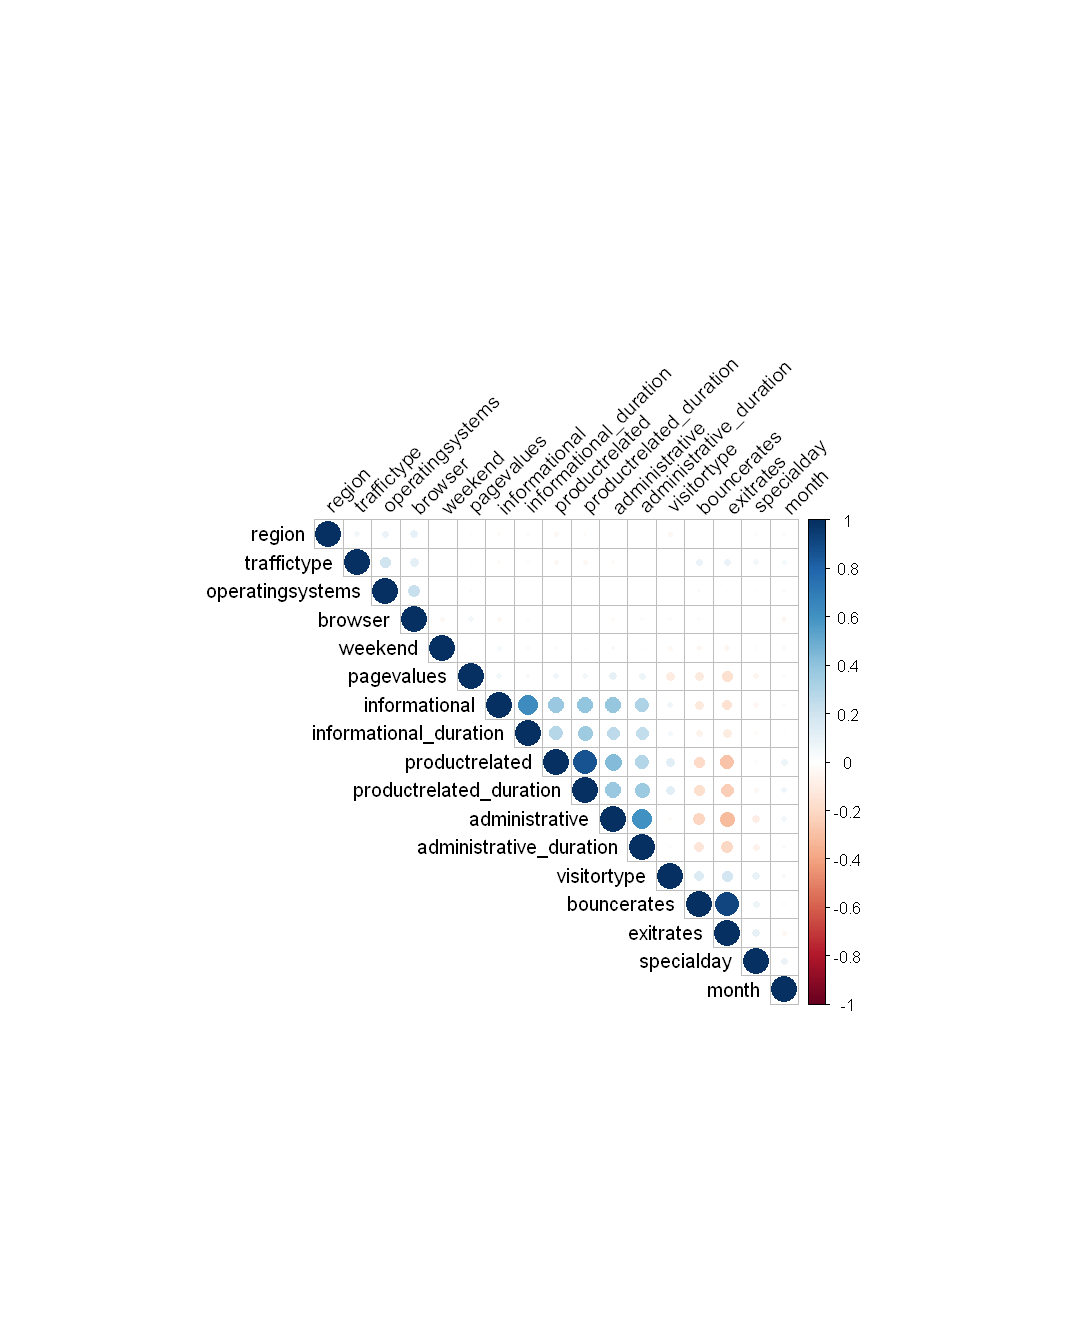

In [392]:
corr = round(cor(select_if(onlin, is.numeric)), 2)
corrplot(corr, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

Positive correlations are displayed in blue and negative correlations in red color. Color intensity and the size of the circle are proportional to the correlation coefficients. In the right side of the correlogram, the legend color shows the correlation coefficients and the corresponding colors.

#### Frequency Tables of the categorical variables

In [311]:
cat_cols = c(10:17)

In [394]:
#this shows the various frequency distributions in the categorical columns in the dataset
columns = colnames(onlin)
for( i in cat_cols){
    print(columns[i])
    print(table(onlin[i]))
    cat('\n')
}


[1] "specialday"

    0   0.2   0.4   0.6   0.8     1 
11065   178   243   351   325   154 

[1] "month"

   1    2    3    4    5    6    7    8    9   10 
 433 1727  184  432  288 1894 3363 2998  549  448 

[1] "operatingsystems"

   1    2    3    4    5    6    7    8 
2582 6593 2552  478    6   19    7   79 

[1] "browser"

   1    2    3    4    5    6    7    8    9   10   11   12   13 
2459 7951  105  735  467  174   49  135    1  163    6   10   61 

[1] "region"

   1    2    3    4    5    6    7    8    9 
4774 1134 2402 1179  317  804  761  434  511 

[1] "traffictype"

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2444 3909 2051 1069  260  444   40  343   42  450  247    1  737   13   37    3 
  17   18   19   20 
   1   10   17  198 

[1] "visitortype"

    1     2     3 
 1694    85 10537 

[1] "weekend"

   1    2 
9451 2865 



### Histograms for Continuous Variables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


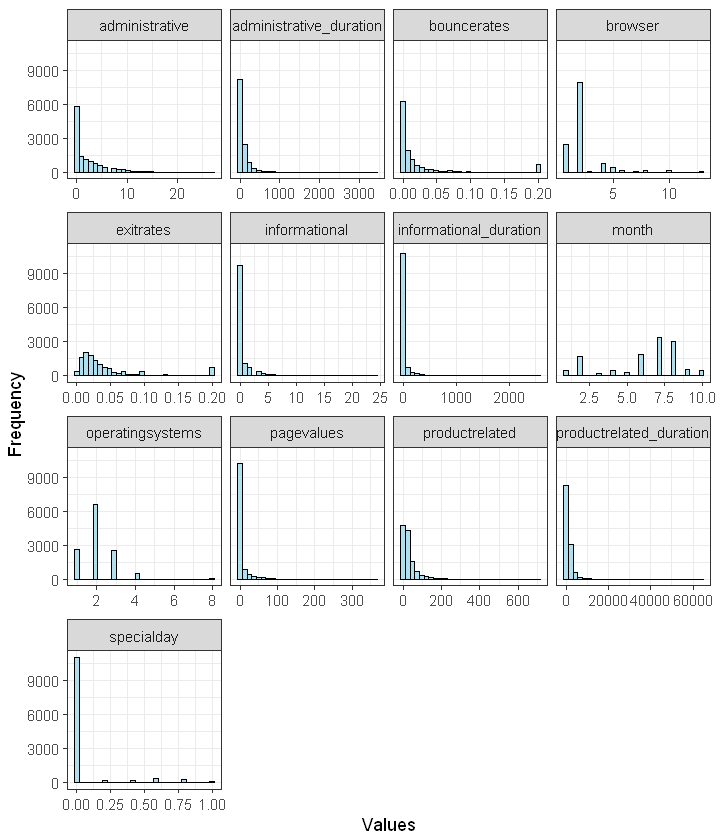

In [395]:
options(repr.plot.width = 6, repr.plot.height = 7)
onlin %>%
  gather(attributes, value, 1:13) %>%
  ggplot(aes(x = value)) +
  geom_histogram(fill = 'lightblue2', color = 'black') +
  facet_wrap(~attributes, scales = 'free_x') +
  labs(x="Values", y="Frequency") +
  theme_bw()

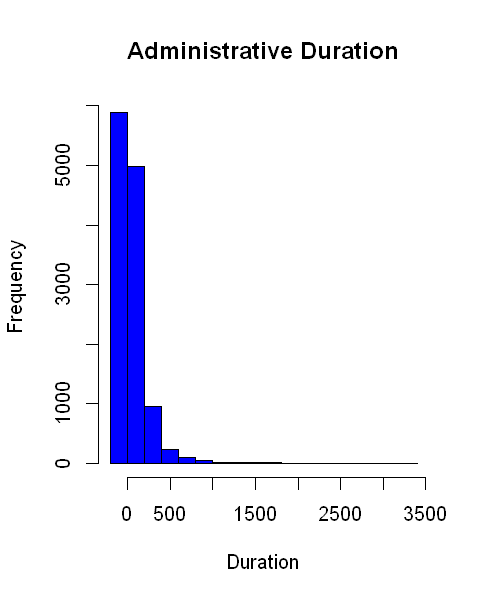

In [396]:
#plotting the distribution of the administrative duration variable
options(repr.plot.width = 4, repr.plot.height = 5)
hist(onlin$administrative_duration, col = 'blue',
    main = 'Administrative Duration',
    xlab = 'Duration',
    ylab = 'Frequency')

The admistrative duration is skewed to the right meaning the mean and median are greater than the mode.

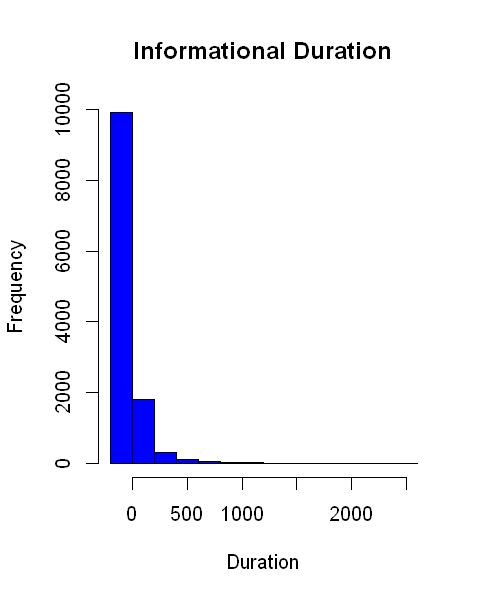

In [397]:
#plotting the distribution of the administrative duration variable
options(repr.plot.width = 4, repr.plot.height = 5)
hist(onlin$informational_duration, col = 'blue',
    main = 'Informational Duration',
    xlab = 'Duration',
    ylab = 'Frequency')

The informational duration is also skewed to the right meaning the mean and median are greater than the mode.

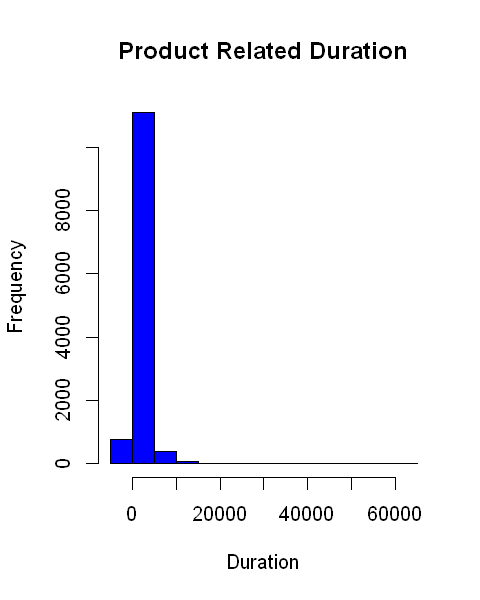

In [398]:
#plotting the distribution of the administrative duration variable
options(repr.plot.width = 4, repr.plot.height = 5)
hist(onlin$productrelated_duration, col = 'blue',
    main = 'Product Related Duration',
    xlab = 'Duration',
    ylab = 'Frequency')

Also skewed to the right

## Unsupervised Learning Algorithms
#### K-Means Clustering

#### Preprocessing the dataset


In [399]:
#previewing the data types in the dataset
str(onlin)

'data.frame':	12316 obs. of  17 variables:
 $ administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ administrative_duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ informational_duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ productrelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ productrelated_duration: num  0 64 -1 2.67 627.5 ...
 $ bouncerates            : num  0.2 0 0.2 0.05 0.02 ...
 $ exitrates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ pagevalues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ specialday             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ month                  : int  3 3 3 3 3 3 3 3 3 3 ...
 $ operatingsystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ traffictype            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ visitortype            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ weekend                : nu

The variables need to be in numerical format for normalization ans modeling, so i shall convert the variables not in mumeric format to numeric data type

In [321]:
# installing the label encoding library cat encoders
install.packages("CatEncoders")
library(CatEncoders)

package 'CatEncoders' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MUENI\AppData\Local\Temp\Rtmp6VUWO2\downloaded_packages



Attaching package: 'CatEncoders'

The following object is masked from 'package:base':

    transform



In [400]:
## Converting logical variable weekend into numerical data type
indx <- sapply(onlin,is.logical)
online[indx] <- lapply(onlin[indx], function(x) as.numeric(as.factor(x)))


## converting the factor variables into numerical data type using label encoder
## Label encoding
factor_cols =  names(which(sapply(onlin, is.factor)))
for(i in factor_cols){
    encode <- LabelEncoder.fit(onlin[,i])
    online[,i]<- transform(encode,onlin[,i])
}

In [401]:
#previewing the data tyoes to confirm the changes have been made
str(onlin)

'data.frame':	12316 obs. of  17 variables:
 $ administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ administrative_duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ informational_duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ productrelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ productrelated_duration: num  0 64 -1 2.67 627.5 ...
 $ bouncerates            : num  0.2 0 0.2 0.05 0.02 ...
 $ exitrates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ pagevalues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ specialday             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ month                  : int  3 3 3 3 3 3 3 3 3 3 ...
 $ operatingsystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ traffictype            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ visitortype            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ weekend                : nu

In [402]:
#scaling the data set so that no particular attribute 
#has more impact on clustering algorithm than others

online_norm <- as.data.frame(scale(onlin))

#previewing the normalized dataset
head(online_norm)

# z<- as.data.frame(apply(online[, 1:17], 2, function(x) (x - min(x))/(max(x)-min(x))))

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6914734,-0.6247671,3.67247746,3.2352400,-0.3173633,-0.309001,-1.334201,-1.2332048,-0.7901988,-0.8941841,-0.76292777,0.4080401,-0.5505615
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.5913358,-0.45743910,1.1745443,-0.3173633,-0.309001,-1.334201,-0.1361914,-0.2081361,-0.8941841,-0.51445574,0.4080401,-0.5505615
-0.6975533,-0.4631119,-0.3966145,-0.2521304,-0.6914734,-0.6252895,3.67247746,3.2352400,-0.3173633,-0.309001,-1.334201,2.0578354,-0.7901988,2.4360812,-0.26598370,0.4080401,-0.5505615
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.6233742,0.57504004,1.9988226,-0.3173633,-0.309001,-1.334201,0.9608220,-0.2081361,-0.4779009,-0.01751167,0.4080401,-0.5505615
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.4891823,-0.2969835,-0.04444744,0.1441964,-0.3173633,-0.309001,-1.334201,0.9608220,0.3739266,-0.8941841,-0.01751167,0.4080401,1.8161802
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.2868911,-0.5442099,-0.13139305,-0.3800157,-0.3173633,-0.309001,-1.334201,-0.1361914,-0.2081361,-0.8941841,-0.26598370,0.4080401,-0.5505615


Computing k-means with the kmeans function. Grouping the data into two clusters (centers = 2). The nstart option attempts multiple initial configurations and reports on the best one. nstart = 25 will generate 25 initial configurations and report on the best one.

In [334]:
#Performing the k-means clustering

set.seed(123)

online_K2 <- kmeans(online_norm, centers = 2, nstart = 25)
print(online_K2)

K-means clustering with 2 clusters of sizes 1950, 10366

Cluster means:
  administrative administrative_duration informational informational_duration
1      1.4497233               1.1848991     1.3726488              1.0532934
2     -0.2727147              -0.2228973    -0.2582158             -0.1981403
  productrelated productrelated_duration bouncerates   exitrates  pagevalues
1      1.3189199               1.2286511 -0.32949819 -0.48933218  0.21977861
2     -0.2481086              -0.2311277  0.06198355  0.09205072 -0.04134365
   specialday       month operatingsystems     browser      region traffictype
1 -0.15439696  0.15807481     -0.019176654 -0.08396272 -0.06225818 -0.11384237
2  0.02904438 -0.02973624      0.003607416  0.01579465  0.01171170  0.02141546
  visitortype      weekend
1   0.2292061  0.046585673
2  -0.0431171 -0.008763464

Clustering vector:
    1     2     3     4     5     6     7     8     9    10    11    12    13 
    2     2     2     2     2     2     2     

In [343]:
install.packages("factoextra")
library("factoextra")

package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MUENI\AppData\Local\Temp\Rtmp6VUWO2\downloaded_packages


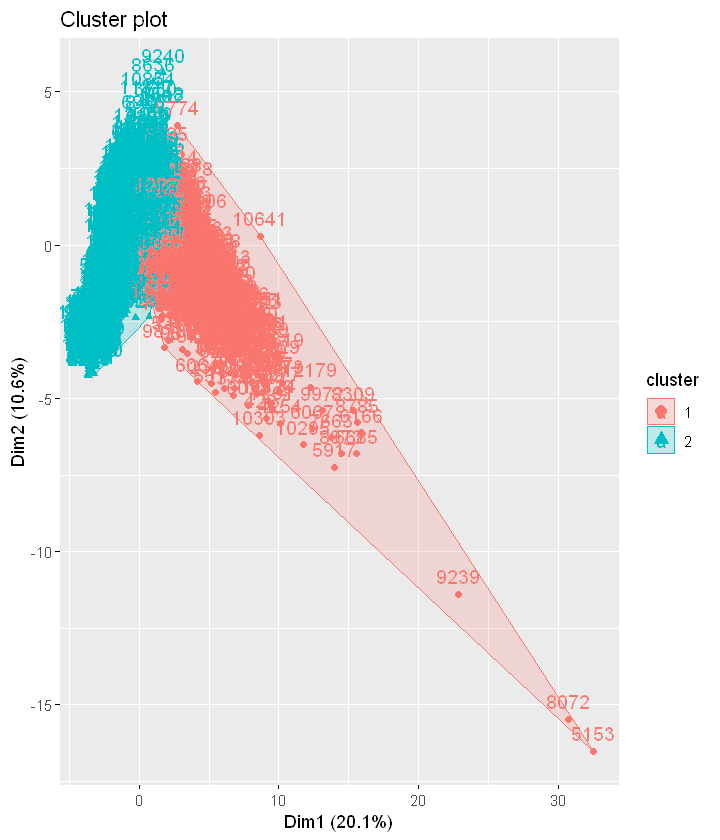

In [344]:
#visual of the data and results of the cluster created.
install.packages("cluster")
fviz_cluster(online_K2, data = online_norm)

In [345]:
# Clusters to which each point is associated
online_K2$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    2     2     2     2     2     2     2     2     2     2     1     2     2 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     1     2     2     2     2     2     2     2     2     2     1     2 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    2     2     2     2     2     1     2     2     2     2     2     2     2 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    2     2     1     2     2     1     1     2     2     1     2     2     2 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    2     2     2     2     1     2     2     2     2     2     2     2     2 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    2     2     2     1     2     2     2     2     2     2     1     2     1 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    2     1     2     2     2     2     2     2     2     1     2     2     2 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    2     1     2     2     2     2     2     2     2     2     1     2     2 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    2     2     2     2     2     2     2     2     2     1     2     2     2 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    2     2     1     2     2     2     2     2     2     2     2     2     2 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    2     2     2     2     2     2     2     2     2     2     2     2     2 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    2     2     1     1     2     2     2     2     2     2     2     2     1 
  326   327   328   329   330   331   332   333   334 

In [346]:
# Cluster centers
online_K2$centers

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
1.4497233,1.1848991,1.3726488,1.0532934,1.3189199,1.2286511,-0.32949819,-0.48933218,0.21977861,-0.15439696,0.15807481,-0.019176654,-0.08396272,-0.06225818,-0.11384237,0.2292061,0.046585673
-0.2727147,-0.2228973,-0.2582158,-0.1981403,-0.2481086,-0.2311277,0.06198355,0.09205072,-0.04134365,0.02904438,-0.02973624,0.003607416,0.01579465,0.01171170,0.02141546,-0.0431171,-0.008763464


In [347]:
# Cluster size
online_K2$size

[1]  1950 10366

In [348]:
# Between clusters sum of square
online_K2$betweenss

[1] 23799.6

Determining Optimal Clusters in order to specify the number of clusters to extract. A bend in the graph can suggest the appropriate number of clusters.

In [350]:
library(ggsignif)

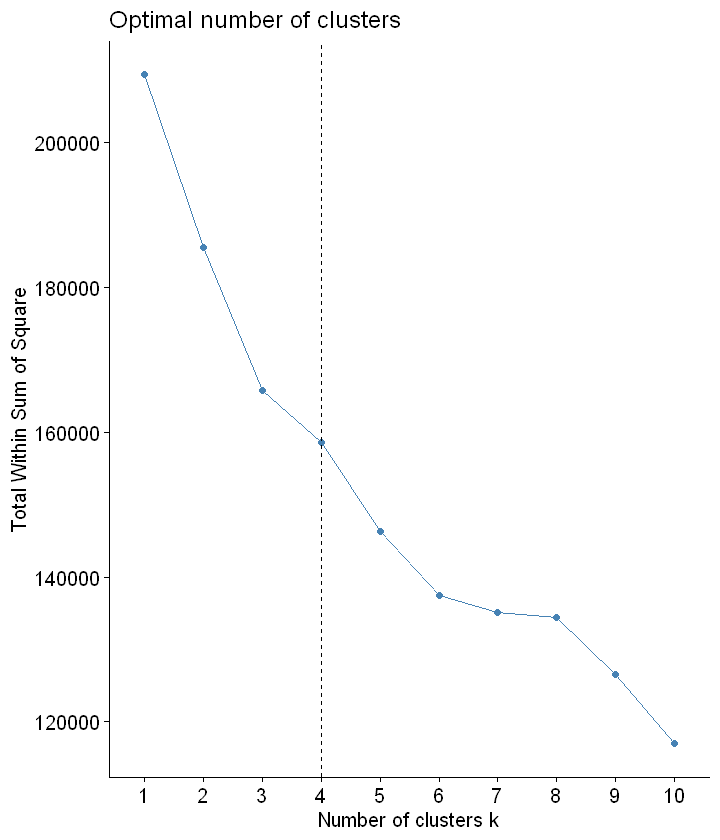

In [351]:
# Determining Optimal clusters (k) Using Elbow method
fviz_nbclust(x = online_norm,FUNcluster = kmeans, method = 'wss' ) + 
geom_vline(xintercept = 4, linetype = 2)

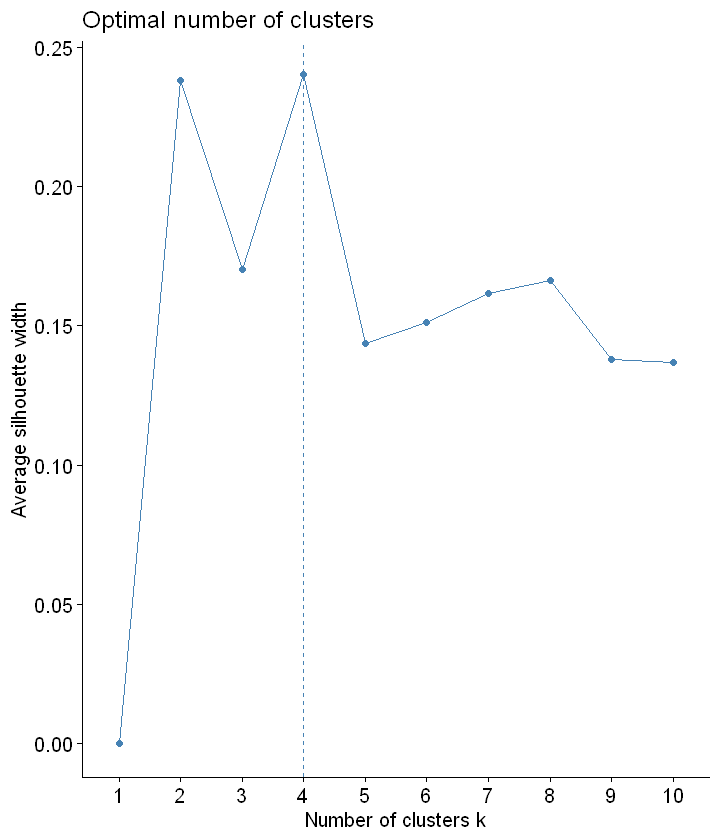

In [353]:
# Determining Optimal clusters (k) Using Average Silhouette Method

fviz_nbclust(x = online_norm,FUNcluster = kmeans, method = 'silhouette' )

Using both the elbow method and silhouette method, the optimal number of clusters is 4. Hence i shall perform the analysis using 4 clusters

In [355]:
# Compute k-means clustering with optimal number of clusters k = 4
set.seed(123)
final <- kmeans(online_norm, centers = 4, nstart = 25)
print(final)

K-means clustering with 4 clusters of sizes 1009, 8112, 1499, 1696

Cluster means:
  administrative administrative_duration informational informational_duration
1    -0.68472767             -0.44967827    -0.3872551             -0.2448028
2    -0.21670024             -0.18960985    -0.2169470             -0.1845867
3     1.56292327              1.31143679     1.6256650              1.3268109
4     0.06246499              0.01532827    -0.1687838             -0.1441721
  productrelated productrelated_duration bouncerates  exitrates  pagevalues
1     -0.6468985              -0.5958216   3.0607175  2.8649785 -0.31736333
2     -0.1415983              -0.1347407  -0.2334240 -0.1592446 -0.06570273
3      1.5560557               1.4677188  -0.3236523 -0.4785192  0.18252626
4     -0.3131847              -0.2982960  -0.4183808 -0.5198533  0.34174131
   specialday       month operatingsystems     browser        region
1  0.24276240 -0.06752235       0.07473088 -0.01430748 -0.0364509768
2  0.0439

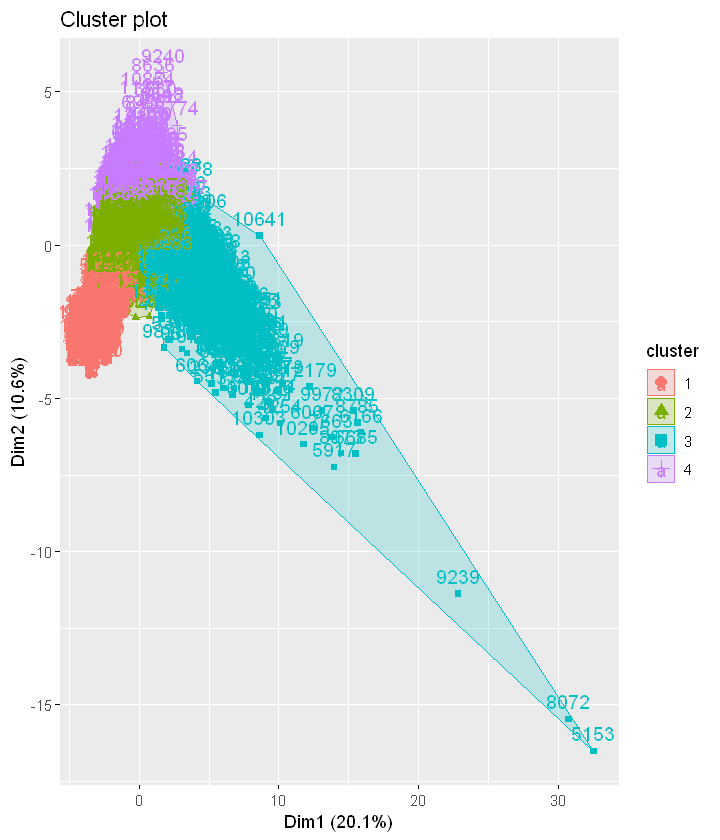

In [357]:
#visual of the final analysis
fviz_cluster(final, data = online_norm)

## Hierarchical Clustering

In [362]:
#Shall use the data that is already scaled for k-means clustering: online_norm
#using the dist() function to compute the Euclidean distance between observations
## d will be the first argument in the hclust() function dissimilarity matrix

dist <- dist(online_norm, method = "euclidean")

In [363]:
#hierarchical clustering using the Ward's method
res.hc <- hclust(dist, method = "ward.D2" )

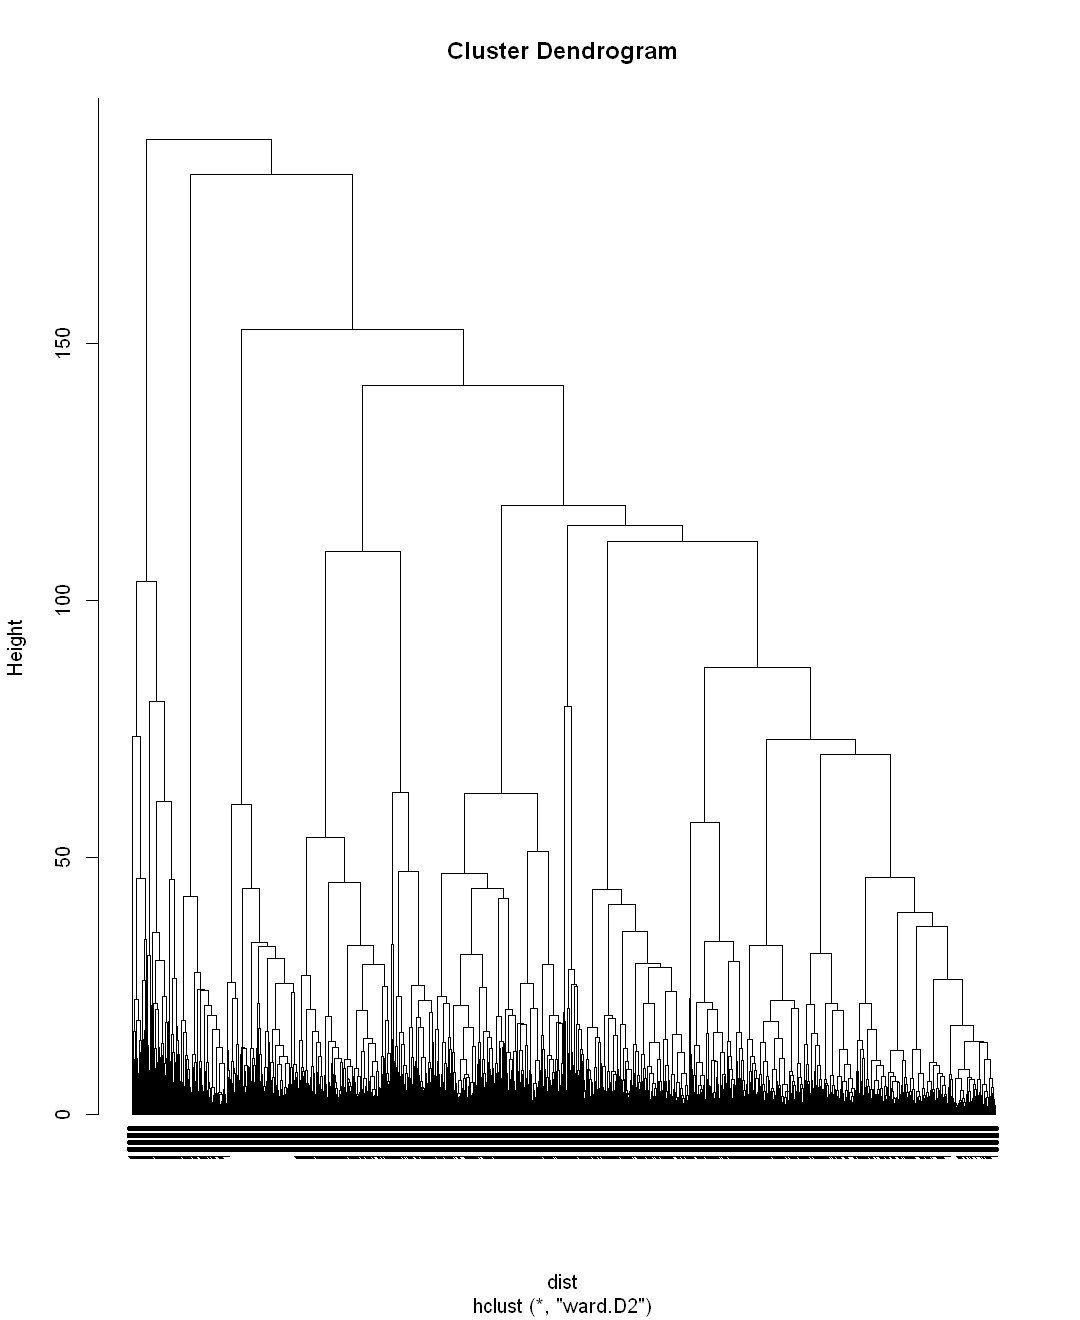

In [364]:
#dendrogram plot: used to split the cluster into multiple clusters of related data points
options(repr.plot.width = 9, repr.plot.height = 11)
plot(res.hc, cex = 0.6, hang = -1)

## Dimensionality Reduction
#### Principle Component Analysis

In [403]:
# Passing the dataframe to the prcomp(). Setting two arguments, center and scale, 
# to be TRUE then preview the object with summary
# ---
# 
online.pca <- prcomp(onlin, center = TRUE, scale. = TRUE)
summary(online.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8480 1.3410 1.18479 1.08846 1.03520 1.01269 0.98812
Proportion of Variance 0.2009 0.1058 0.08257 0.06969 0.06304 0.06033 0.05743
Cumulative Proportion  0.2009 0.3067 0.38925 0.45894 0.52197 0.58230 0.63973
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.97707 0.96483 0.93395 0.91605 0.89795 0.86625 0.64892
Proportion of Variance 0.05616 0.05476 0.05131 0.04936 0.04743 0.04414 0.02477
Cumulative Proportion  0.69589 0.75065 0.80196 0.85132 0.89875 0.94289 0.96766
                          PC15    PC16    PC17
Standard deviation     0.59280 0.35046 0.27478
Proportion of Variance 0.02067 0.00722 0.00444
Cumulative Proportion  0.98833 0.99556 1.00000

In [369]:
str(online.pca)

List of 5
 $ sdev    : num [1:17] 1.85 1.34 1.18 1.09 1.04 ...
 $ rotation: num [1:17, 1:17] 0.381 0.327 0.346 0.294 0.41 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:17] "administrative" "administrative_duration" "informational" "informational_duration" ...
  .. ..$ : chr [1:17] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:17] 2.318 80.906 0.504 34.506 31.764 ...
  ..- attr(*, "names")= chr [1:17] "administrative" "administrative_duration" "informational" "informational_duration" ...
 $ scale   : Named num [1:17] 3.32 176.86 1.27 140.83 44.49 ...
  ..- attr(*, "names")= chr [1:17] "administrative" "administrative_duration" "informational" "informational_duration" ...
 $ x       : num [1:12316, 1:17] -3.233 -1.43 -3.382 -2.049 -0.988 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:12316] "1" "2" "3" "4" ...
  .. ..$ : chr [1:17] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [370]:
summary(online.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8480 1.3410 1.18479 1.08846 1.03520 1.01269 0.98812
Proportion of Variance 0.2009 0.1058 0.08257 0.06969 0.06304 0.06033 0.05743
Cumulative Proportion  0.2009 0.3067 0.38925 0.45894 0.52197 0.58230 0.63973
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.97707 0.96483 0.93395 0.91605 0.89795 0.86625 0.64892
Proportion of Variance 0.05616 0.05476 0.05131 0.04936 0.04743 0.04414 0.02477
Cumulative Proportion  0.69589 0.75065 0.80196 0.85132 0.89875 0.94289 0.96766
                          PC15    PC16    PC17
Standard deviation     0.59280 0.35046 0.27478
Proportion of Variance 0.02067 0.00722 0.00444
Cumulative Proportion  0.98833 0.99556 1.00000

PC1 explains only 20.09% of the total variance in the dataset, this is not a very good presentation

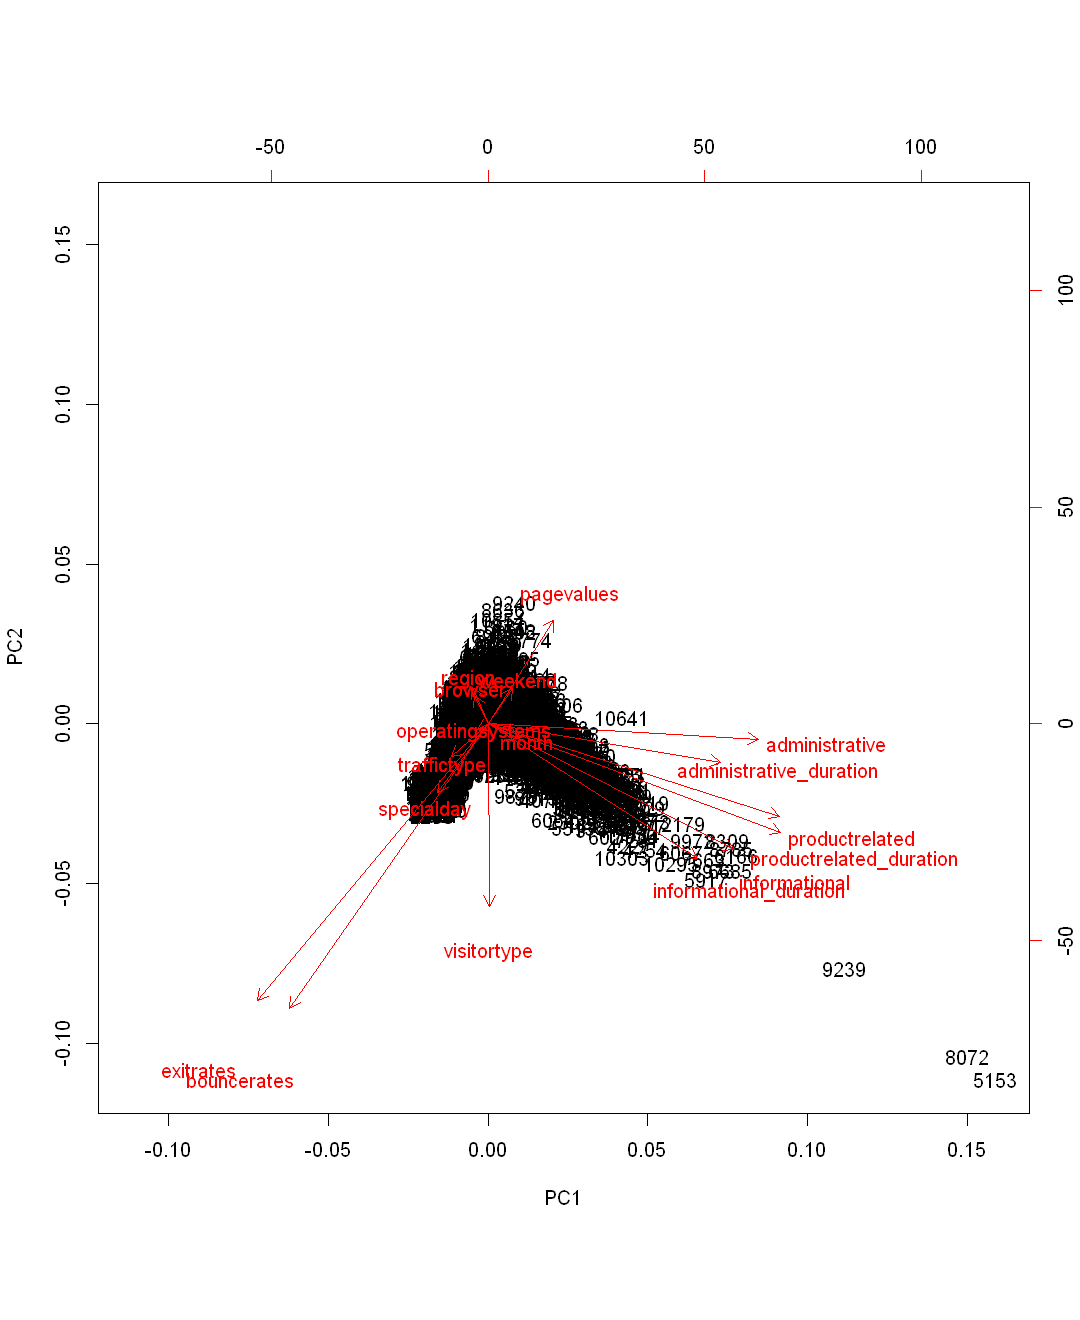

In [371]:
biplot(online.pca)

## t-Distributed Stochastic Neighbour Embedding

In [372]:
# Installing Rtnse package
# 
install.packages("Rtsne")
# Loading our tnse library
# 
library(Rtsne)

package 'Rtsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MUENI\AppData\Local\Temp\Rtmp6VUWO2\downloaded_packages


In [404]:
# Curating the database for analysis 
Labels <- online.class

online.class<-as.factor(onlin)

In [405]:
# For plotting
#
colors = rainbow(length(unique(online.class)))
                        
names(colors) = unique(online.class)

In [408]:
#ckecking for duplicates
anyDuplicated(onlin)

[1] 159

In [ ]:
#removing duplicates
#removing the duplicated values
df = na.omit(online)
head(onlin)

In [407]:
# Executing the algorithm on curated data
# 
tsne <- Rtsne(onlin[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA


ERROR: Error in Rtsne.default(X, ...): Remove duplicates before running TSNE.
